In [1]:
# Batuhan Faik Derinbay
# 150180705
#########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import math
import random
# import any other non-machine learning modules that you wish
# SHORTCUTS: Alt + Enter includes new cell below, CTRL + Enter executes the current cell
##########################
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 
df2m = pd.read_csv("train2_modified.csv") #will be used in Part D

In [2]:
# By printing a dataframe, you can view the data in csv format
df1.head()

,x1,x2,y
0,-0.260234,2.767817,0
1,3.466190,6.054691,1
2,-2.036224,4.491902,0
3,2.434426,6.638656,1
4,-0.541338,3.210246,0


In [3]:
# You can extract keys from dataframe, which you can use to extract features or labels.
print(df1.keys())
df1_x1 = df1['x1']
df1_x2 = df1['x2']
# To extract data as numpy array:
df1_numpy = df1.values
# You can also extract a specific feature as numpy array as well.
df1_x1_numpy = df1['x1'].values

Index(['x1', 'x2', 'y'], dtype='object')


In [4]:
df2_numpy = df2.values
data = df2_numpy[:, 0:2]
labels = df2_numpy[:, 2]
print(data.shape)
print(labels.shape)
data_0 = data[labels == 0]
data_1 = data[labels == 1]

print(np.cov(np.transpose(data_0)))
print(np.cov(np.transpose(data_1)))

(1600, 2)
(1600,)
[[1.92211159 0.85797698]
 [0.85797698 2.83934376]]
[[ 0.99769947 -0.81880324]
 [-0.81880324  2.94962903]]


# Add your comments as markdown cells(This is a markdown cell).

## To add a markdown cell, simply click on a cell, then click on the 'Cell' tab above, change 'Cell Type' to 'Markdown'

Then add your comment! To view the format of this markdown cell, double click on here.

### Note: We provide you with example codes for starter, but feel free to delete anything we provide and write your own code, as long as you use allowed libraries and modules. 

## Part A: Examine training sets

### Covariance Matrices

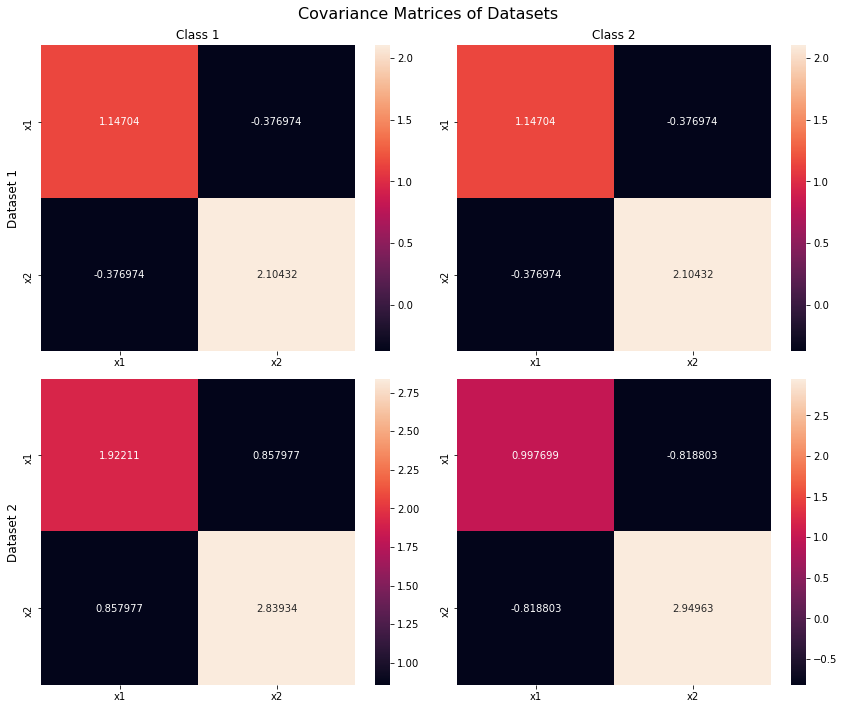

In [5]:
# PART A: Examine training sets here. plots etc.
ds1_c1, ds1_c2 = df1.loc[df1['y'] == 0][["x1", "x2"]].values, df1.loc[df1['y'] == 1][["x1", "x2"]].values
ds2_c1, ds2_c2 = df2.loc[df2['y'] == 0][["x1", "x2"]].values, df2.loc[df2['y'] == 1][["x1", "x2"]].values

ds1_c1_cov, ds1_c2_cov = np.cov(np.transpose(ds1_c1)), np.cov(np.transpose(ds1_c2))
ds2_c1_cov, ds2_c2_cov = np.cov(np.transpose(ds2_c1)), np.cov(np.transpose(ds2_c2))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sns.heatmap(ds1_c1_cov, annot=True, fmt='g', xticklabels=["x1", "x2"], yticklabels=["x1", "x2"], ax=axes[0][0])
sns.heatmap(ds1_c2_cov, annot=True, fmt='g', xticklabels=["x1", "x2"], yticklabels=["x1", "x2"], ax=axes[0][1])
sns.heatmap(ds2_c1_cov, annot=True, fmt='g', xticklabels=["x1", "x2"], yticklabels=["x1", "x2"], ax=axes[1][0])
sns.heatmap(ds2_c2_cov, annot=True, fmt='g', xticklabels=["x1", "x2"], yticklabels=["x1", "x2"], ax=axes[1][1])
axes[0][0].set_title("Class 1")
axes[0][1].set_title("Class 2")
axes[0][0].set_ylabel("Dataset 1", fontsize=12)
axes[1][0].set_ylabel("Dataset 2", fontsize=12)
fig.suptitle("Covariance Matrices of Datasets", fontsize=16)
fig.tight_layout()
plt.show()
# In the first dataset, covariance matrices of both classes are equal. Therefore, Mahalanobis distance can be used to measure 
# the distance between means of classes. Although lines connecting means may not be perpendicular to the decision boundaries,
# decision boundaries themselves will be linear.
# In the second dataset, covariance matrices of classes are not equal. Therefore expected decision boundaries are quadratic.

### Histograms

-0.486852526


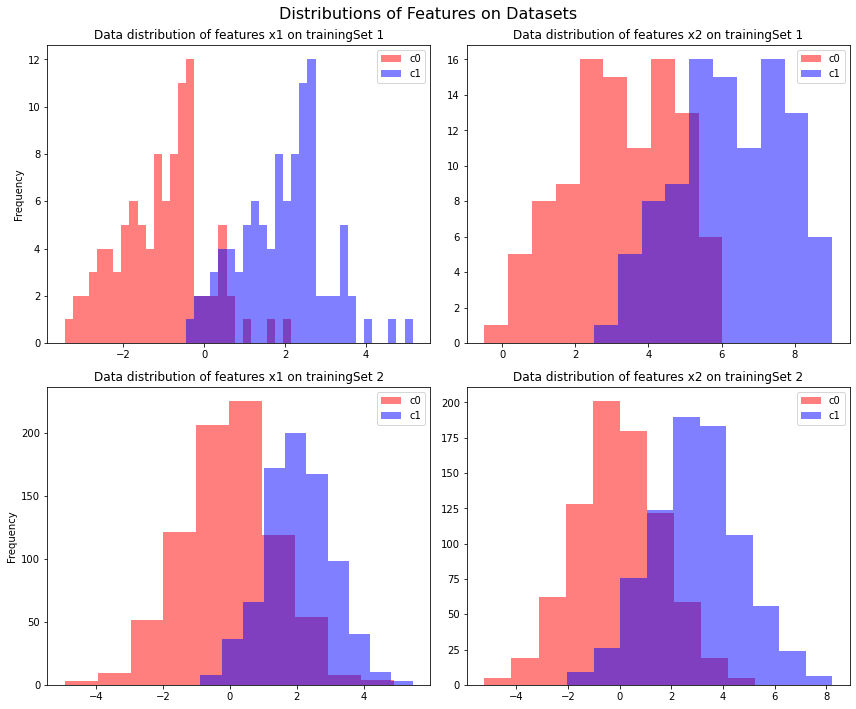

In [177]:
ds1_c1_f1, ds1_c1_f2 = ds1_c1[:,0], ds1_c1[:,1]
ds1_c2_f1, ds1_c2_f2 = ds1_c2[:,0], ds1_c2[:,1]
ds2_c1_f1, ds2_c1_f2 = ds2_c1[:,0], ds2_c1[:,1]
ds2_c2_f1, ds2_c2_f2 = ds2_c2[:,0], ds2_c2[:,1]

bin_width = 0.2
bins = lambda x : np.arange(np.min(x), np.max(x)+bin_width, bin_width)

print(np.min(ds1_c1_f2))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes[0,0].hist(ds1_c1_f1, bins=bins(ds1_c1_f1), alpha=0.5, color="r")
axes[0,0].hist(ds1_c2_f1, bins=bins(ds1_c2_f1), alpha=0.5, color="b")
axes[0,0].set_title("Data distribution of features x1 on trainingSet 1")
axes[0,0].set_ylabel("Frequency")
axes[0,1].hist(ds1_c1_f2, bins=bins(ds1_c1_f2), alpha=0.5, color="r")
axes[0,1].hist(ds1_c2_f2, bins=bins(ds1_c2_f2), alpha=0.5, color="b")
axes[0,1].set_title("Data distribution of features x2 on trainingSet 1")
axes[1,0].hist(ds2_c1_f1, bins=bins(ds2_c1_f1), alpha=0.5, color="r")
axes[1,0].hist(ds2_c2_f1, bins=bins(ds2_c2_f1), alpha=0.5, color="b")
axes[1,0].set_title("Data distribution of features x1 on trainingSet 2")
axes[1,0].set_ylabel("Frequency")
axes[1,1].hist(ds2_c1_f2, bins=bins(ds2_c1_f2), alpha=0.5, color="r")
axes[1,1].hist(ds2_c2_f2, bins=bins(ds1_c1_f1), alpha=0.5, color="b")
axes[1,1].set_title("Data distribution of features x2 on trainingSet 2")
for i in range(2):
    for j in range(2):
        axes[i, j].legend(labels=["c0", "c1"], loc="best")
fig.suptitle("Distributions of Features on Datasets", fontsize=16)
fig.tight_layout()
plt.show()
# While there is a clear data fracture visible for feature x1 on training set 1, other distributions of features
# seem to be not so easily separable. However this shouldn't stop us from trying :)

### Scatter Plots

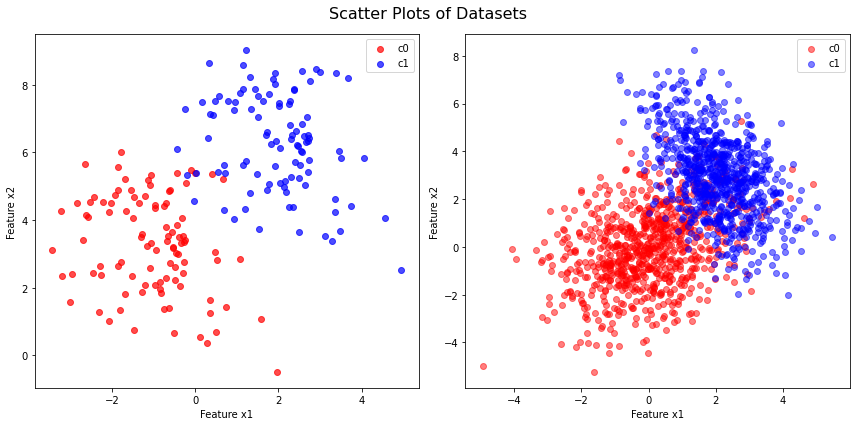

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].scatter(ds1_c1_f1, ds1_c1_f2, color="r", alpha=0.7)
axes[0].scatter(ds1_c2_f1, ds1_c2_f2, color="b", alpha=0.7)
axes[1].scatter(ds2_c1_f1, ds2_c1_f2, color="r", alpha=0.5)
axes[1].scatter(ds2_c2_f1, ds2_c2_f2, color="b", alpha=0.5)
for i in range(2):
    axes[i].legend(labels=["c0", "c1"], loc="best")
    axes[i].set_xlabel("Feature x1")
    axes[i].set_ylabel("Feature x2")
fig.suptitle("Scatter Plots of Datasets", fontsize=16)
fig.tight_layout()
plt.show()

## Part B: Implement Naive Bayes Classifier

In [8]:
# Implement PART B:
# Section 1
test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")

ds1_c1_mean = np.mean(np.transpose(ds1_c1), axis=1)
print("Mean Vector of Dataset 1, Class 1:\n", ds1_c1_mean)
print("Covariance Matrix of Dataset 1, Class 1:\n", ds1_c1_cov)

ds1_c2_mean = np.mean(np.transpose(ds1_c2), axis=1)
print("\nMean Vector of Dataset 1, Class 2:\n", ds1_c2_mean)
print("Covariance Matrix of Dataset 1, Class 2:\n", ds1_c2_cov)

ds2_c1_mean = np.mean(np.transpose(ds2_c1), axis=1)
print("\nMean Vector of Dataset 2, Class 1:\n", ds2_c1_mean)
print("Covariance Matrix of Dataset 2, Class 1:\n", ds2_c1_cov)

ds2_c2_mean = np.mean(np.transpose(ds2_c2), axis=1)
print("\nMean Vector of Dataset 2, Class 2:\n", ds2_c2_mean)
print("Covariance Matrix of Dataset 2, Class 2:\n", ds2_c2_cov)

Mean Vector of Dataset 1, Class 1:
 [-1.04624698  3.26924606]
Covariance Matrix of Dataset 1, Class 1:
 [[ 1.1470413  -0.37697361]
 [-0.37697361  2.1043151 ]]

Mean Vector of Dataset 1, Class 2:
 [1.95375302 6.26924606]
Covariance Matrix of Dataset 1, Class 2:
 [[ 1.1470413  -0.37697361]
 [-0.37697361  2.1043151 ]]

Mean Vector of Dataset 2, Class 1:
 [ 0.00246486 -0.01971604]
Covariance Matrix of Dataset 2, Class 1:
 [[1.92211159 0.85797698]
 [0.85797698 2.83934376]]

Mean Vector of Dataset 2, Class 2:
 [2.0536608  2.97765078]
Covariance Matrix of Dataset 2, Class 2:
 [[ 0.99769947 -0.81880324]
 [-0.81880324  2.94962903]]


In [90]:
def discriminant_func(train_data, case=None):
    N = train_data.shape[0]
    data_points = train_data[:, 0:2]
    labels = train_data[:, 2]
    c1, c2 = data_points[labels == 0], data_points[labels == 1]
    c1_cov, c2_cov = np.cov(np.transpose(c1)), np.cov(np.transpose(c2))
    c1_mean, c2_mean = np.mean(np.transpose(c1), axis=1), np.mean(np.transpose(c2), axis=1)
    c1_var, c2_var = np.var(np.transpose(c1), axis=1), np.var(np.transpose(c2), axis=1)
    p_c1, p_c2 = c1.shape[0]/N, c2.shape[0]/N
        
    if (all(i == c1_var[0] for i in c1_var) and all(i == c2_var[0] for i in c2_var)) or case == 2:    # Case 2
        if p_c1 == p_c2:
            f1 = lambda x : -np.square(np.linalg.norm(x - c1_mean))
            f2 = lambda x : -np.square(np.linalg.norm(x - c2_mean))
        else:
            sigma1 = c1_var[0]
            sigma2 = c2_var[0]
            f1 = lambda x : -(1/(2*np.square(sigma1)))*np.square(np.linalg.norm(x - c1_mean)) + np.log(p_c1)
            f2 = lambda x : -(1/(2*np.square(sigma2)))*np.square(np.linalg.norm(x - c2_mean)) + np.log(p_c2)
    elif (not np.allclose(c1_mean, c2_mean) and np.allclose(c1_cov, c2_cov)) or case == 1:    # Case 1
        f1 = lambda x : np.dot(np.dot(x, np.linalg.inv(c1_cov)), np.transpose(c1_mean)) - (1/2)*np.dot(np.dot(np.transpose(c1_mean), np.linalg.inv(c1_cov)), c1_mean) + np.log(p_c1)
        f2 = lambda x : np.dot(np.dot(x, np.linalg.inv(c2_cov)), np.transpose(c2_mean)) - (1/2)*np.dot(np.dot(np.transpose(c2_mean), np.linalg.inv(c2_cov)), c2_mean) + np.log(p_c2)
    else:    # Case 3 
        f1 = lambda x : -np.multiply(1/2, np.dot((x-c1_mean), np.dot(np.linalg.pinv(c1_cov), np.transpose(x-c1_mean)))) - np.multiply(1/2, np.log(np.linalg.det(c1_cov))) + np.log(p_c1)
        f2 = lambda x : -np.multiply(1/2, np.dot((x-c2_mean), np.dot(np.linalg.pinv(c2_cov), np.transpose(x-c2_mean)))) - np.multiply(1/2, np.log(np.linalg.det(c2_cov))) + np.log(p_c2)
        
    func = lambda x : 1 if f2(x) > f1(x) else 0
    return func

In [95]:
def test_model(train_set, test_set):
    test_data = test_set[:,0:2]
    test_label = test_set[:,2]
    discriminant = discriminant_func(train_set)
    results = np.empty(test_set.shape[0])
    for i, data_point in enumerate(test_data):
        results[i] = discriminant(data_point)
    acc = np.sum(np.equal(results, test_label))/results.shape[0]
    err = 1 - acc
    return acc, err

In [121]:
train_sets = (pd.read_csv("train1.csv").values, pd.read_csv("train2.csv").values)
test_sets = (pd.read_csv("test1.csv").values, pd.read_csv("test2.csv").values)
sets = [(train_sets[i], test_sets[i]) for i in range(len(train_sets))]

for train_set, test_set in sets:
    acc, err = test_model(train_set, test_set)
    print("Test set #{}\nAccuracy: {:06.2f}\nError Rate: {:06.2f}\n".format(set_index+1, acc*100, err*100))

Test set #1
Accuracy: 098.00
Error Rate: 002.00

Test set #1
Accuracy: 088.50
Error Rate: 011.50



## Part C: Implement K-Fold Cross Validation

In [122]:
# Implement PART C:
# Dataset 1
ds1 = np.concatenate(sets[0], axis=0)
# Dataset 2
ds2 = np.concatenate(sets[1], axis=0)

In [141]:
from sklearn.model_selection import KFold
seed = random.seed(1)
n_splits = 5
accs, errs = [], []
kf = KFold(n_splits=n_splits, random_state=seed, shuffle=True)
for train_index, test_index in kf.split(ds1):
    train_set, test_set = ds1[train_index], ds1[test_index]
    acc, err = test_model(train_set, test_set)
    accs.append(acc), errs.append(err)

avg_acc = np.sum(accs)/n_splits
avg_err = np.sum(errs)/n_splits
print("Dataset #1\nAverage Accuracy: {:06.2f}\nAverage Error: {:06.2f}\n".format(avg_acc*100, avg_err*100))

accs, errs = [], []
kf = KFold(n_splits=n_splits, random_state=seed, shuffle=True)
for train_index, test_index in kf.split(ds2):
    train_set, test_set = ds2[train_index], ds2[test_index]
    acc, err = test_model(train_set, test_set)
    accs.append(acc), errs.append(err)

avg_acc = np.sum(accs)/n_splits
avg_err = np.sum(errs)/n_splits
print("Dataset #2\nAverage Accuracy: {:06.2f}\nAverage Error: {:06.2f}\n".format(avg_acc*100, avg_err*100))

Dataset #1
Average Accuracy: 096.67
Average Error: 003.33

Dataset #2
Average Accuracy: 089.75
Average Error: 010.25



## Part D: Redo the experiments on modified Dataset 2

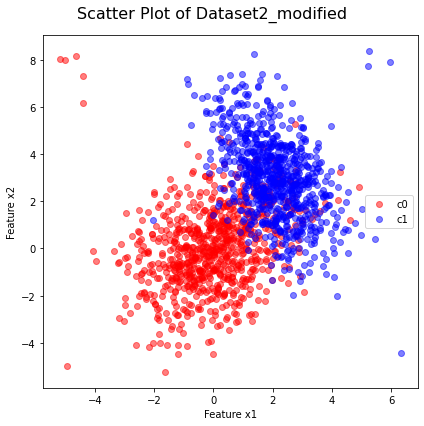

In [148]:
# Implement Part D:
modified_set = pd.read_csv("train2_modified.csv").values
data_points = modified_set[:, 0:2]
labels = modified_set[:, 2]

ms_c1, ms_c2 = data_points[labels == 0], data_points[labels == 1]

ms_c1_f1, ms_c1_f2 = ms_c1[:,0], ms_c1[:,1]
ms_c2_f1, ms_c2_f2 = ms_c2[:,0], ms_c2[:,1]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axes.scatter(ms_c1_f1, ms_c1_f2, color="r", alpha=0.5)
axes.scatter(ms_c2_f1, ms_c2_f2, color="b", alpha=0.5)
axes.legend(labels=["c0", "c1"], loc="best")
axes.set_xlabel("Feature x1")
axes.set_ylabel("Feature x2")
fig.suptitle("Scatter Plot of Dataset2_modified", fontsize=16)
fig.tight_layout()
plt.show()

In [152]:
test_set = pd.read_csv("test2.csv").values
acc, err = test_model(modified_set, test_set)
print("Accuracy: {:06.2f}\nError Rate: {:06.2f}\n".format(acc*100, err*100))

Accuracy: 087.75
Error Rate: 012.25



What you talkin bout?